# Sesión 8

## Modelos de regresión lineal

> **Objetivos:**
> - Revisitar modelos de predicción lineal desde una perspectiva de Montecarlo.

## 1. Predicción lineal

Hasta ahora hemos trabajado con un modelo gaussiano para describir la altura en una población de adultos. Sin embargo, este modelo no incorpora aún un **componente predictivo**, es decir, una relación explícita entre la altura y otras variables que puedan explicarla.

Para ello introducimos el concepto de **regresión**, donde modelamos la media de la distribución ($\mu_i$) como una función de uno o más predictores, como el **peso**, la **edad** o el **sexo** de cada individuo.

En esta sección aprenderemos cómo incorporar predictores en el modelo de manera **lineal**.

Continuaremos con los datos de la población adulta, pero ahora analizaremos _cómo la altura se relaciona con el peso_.

In [1]:
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
ruta = os.path.join('..', '..', '..', 'docs', 'source', 'data')

In [4]:
ruta_data = os.path.join(ruta, 'Howell1.csv')
df = pd.read_csv(ruta_data, sep=';')
df.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


<Axes: xlabel='weight', ylabel='height'>

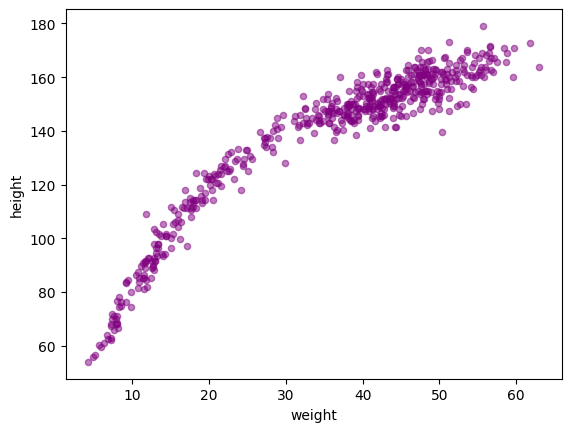

In [5]:
df.plot.scatter(x='weight',
                y='height',
                color='purple',
                alpha=0.5)

<Axes: xlabel='weight', ylabel='height'>

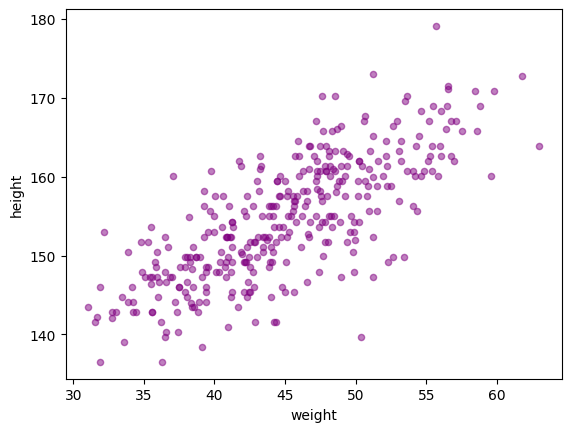

In [6]:
adultos = df[df.age >= 18].copy()
adultos.plot.scatter(x='weight',
                     y='height',
                     color='purple',
                     alpha=0.5)

> Peso → es la variable predictora (o variable independiente).
>
> Altura → es la variable respuesta (o dependiente).

In [7]:
adultos.describe()

,height,weight,age,male
count,352.000000,352.000000,352.000000,352.000000
mean,154.597093,44.990486,41.138494,0.468750
std,7.742332,6.456708,15.967855,0.499733
min,136.525000,31.071052,18.000000,0.000000
25%,148.590000,40.256290,28.000000,0.000000
50%,154.305000,44.792210,39.000000,0.000000
75%,160.655000,49.292693,51.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


Del gráfico anterior observamos que existe una relación clara entre la **altura** y el **peso**. En otras palabras, conocer el peso de una persona nos puede ayudar a predecir su altura.

### **¿Cómo incorporamos el peso como predictor en el modelo de altura?**

En el modelo gaussiano original, la altura de todas las personas se describe con la misma **media $\mu$**. Pero si creemos que la **altura cambia con el peso**, entonces esa media no debería ser fija.

Por eso, hacemos que $\mu$ **dependa linealmente del peso**:

$$\mu_i = \alpha + \beta(w_i - \bar{w})$$

Finalmente, debemos asignar _distribuciones previas_ a estos nuevos parámetros $(\alpha, \beta, \sigma)$ para reflejar nuestra incertidumbre antes de observar los datos.

###  (a) Modelo inicial

* **Planteamiento del modelo sin predictores**

$$
\begin{align}
\begin{array}{lcl}
h_i & \sim & \text{Normal}(\mu, \sigma) \\
\mu & \sim & \text{Normal}(170, 20) \\
\sigma & \sim & \text{Uniform}(0, 50)
\end{array}
\end{align}
$$

En el modelo inicial, asumíamos que **todas las personas tienen la misma media** $\mu$ para la altura:

$$
h_i \sim \text{Normal}(\mu, \sigma)
$$

donde $\mu$ es la **altura promedio** de toda la población.

* **El nuevo planteamiento**

Sabemos que la _altura depende del peso_.

Entonces, ya no queremos que $\mu$ sea constante, sino que **cambie según el peso de cada persona $w_i$**.

Para eso, hacemos que $\mu_i$ (la media para cada persona $i$) depende linealmente del peso:

$$
\mu_i = \alpha + \beta (w_i - \bar{w})
$$

Esa relación $\alpha + \beta$ es la forma típica de un modelo lineal, una recta con:

* **intercepto** $\alpha$
* **pendiente** $\beta$
* predictor $w_i - \bar{w}$ (peso centrado)

### (b) modelo con peso como predictor

Sea $w_i$ el peso de la persona $i$ y $\bar{w}$ el promedio de todos los pesos. Definimos:

$$
\begin{align}
\begin{array}{lcl}
h_i & \sim & \text{Normal}(\mu_i, \sigma) \\
\mu_i & = & \alpha + \beta(w_i - \bar{w}) \\
\alpha & \sim & \text{Normal}(170, 20) \\
\beta & \sim & \text{Normal}(0, 10) \\
\sigma & \sim & \text{Uniform}(0, 50)
\end{array}
\end{align}
$$

En este nuevo modelo, 

* $\alpha$ representa la **altura promedio** cuando el peso está en su media.

* $\beta$ indica **cuánto cambia la altura** en promedio por cada unidad de cambio en el peso.

```{admonition} ¿Qué significa lo anterior?
:class: tip

$$
h_i \sim \text{Normal}(\mu_i, \sigma)
$$

Como antes, representa la _verosimilitud_, es decir, la probabilidad de los datos observados. La diferencia es que ahora sustituimos la media general $\mu$ por una media específica $\mu_i$ para cada observación.

En otras palabras, la media **ya no es constante**, sino que depende del valor del predictor de cada individuo.

$$
\mu_i = \alpha + \beta (w_i - \bar{w})
$$

Aquí, $\mu_i$ **ya no es una parámetro aleatorio**, sino una _relación determinista_ entre los nuevos parámetros $\alpha$ y $\beta$ y la variable observada $w_i$ (peso). Por eso usamos el símbolo "=" en lugar de "$\sim$".

El parámetro $\beta$ representa el **cambio esperado en la altura** cuando el peso aumenta en una unidad (por ejemplo, 1 kg).

* Demás expresiones

Corresponden a las _previas_ de los parámetros. Como en los modelos anteriores, pueden ajustarse con ayuda de **simulaciones predictivas previas**, para asegurar que los valores iniciales sean razonables.
```

<details>
<summary> Curiosidades 💡</summary>

En el modelo bayesiano, el error no desaparece: está “dentro” de la distribución normal.
 
$\sigma$ mide cuánta incertidumbre o ruido hay alrededor de la línea promedio.

| **Enfoque** | **Expresión** | **Cómo representa el error** |
|--------------|---------------|------------------------------|
| Mínimos cuadrados | $h_i = \alpha + \beta x_i + \varepsilon_i$ | $\varepsilon_i$ es el error explícito |
| Bayesiano / Probabilístico | $h_i \sim \text{Normal}(\mu_i, \sigma)$ | $\sigma$ controla la variabilidad (error implícito) |

</details>

### (c) Simulación previa predictiva

In [8]:
N = 100
w = adultos.weight.values
w_bar = np.mean(w)

In [9]:
print(w[:10])
print(w.shape)

[47.8256065 36.4858065 31.864838  53.0419145 41.276872  62.992589
 38.2434755 55.4799715 34.869885  54.487739 ]
(352,)


In [10]:
w_bar

np.float64(44.99048551988636)

In [11]:
# Muestrar las distribuciones previas

# alpha ~ Normal(170, 20)
alpha_samples = stats.norm.rvs(loc=170,
                               scale=20, 
                               size=N)

# beta ~ Normal(0, 10)
beta_samples = stats.norm.rvs(loc=0,
                               scale=10,
                               size=N)

# sigma ~ Uniform(0, 50)
sigma_samples = stats.uniform.rvs(loc=0,
                                   scale=50,
                                   size=N)

In [12]:
# print samples
print(alpha_samples.shape)
print(beta_samples.shape)
print(sigma_samples.shape)

(100,)
(100,)
(100,)


In [13]:
# Relación lineal de la altura promedio con el peso
mu = alpha_samples + beta_samples * (w - w_bar).reshape(-1, 1)

In [14]:
# print mu shape
print(mu.shape)

(352, 100)


In [15]:
mu

array([[190.50621137, 205.10569236, 168.1755669 , ..., 153.79399292,
        179.0083723 , 209.94168737],
       [121.45744117, 105.26474304, 132.79420402, ..., 323.16465285,
         43.23252108, 126.48919227],
       [ 93.32006731,  64.57955619, 118.37629864, ..., 392.18319678,
        -12.09613829,  92.48230051],
       ...,
       [216.91736598, 243.29485548, 181.7089382 , ...,  89.00971549,
        230.94263539, 241.86226674],
       [228.48303499, 260.01821449, 187.63531648, ...,  60.64012995,
        253.68509047, 255.84055967],
       [219.16145101, 246.53968633, 182.85883249, ...,  83.50516904,
        235.35535056, 244.57447283]], shape=(352, 100))

In [16]:
# Muestrar la distribución de la altura

# height ~ Normal(mu, sigma)
height_samples = stats.norm.rvs(loc=mu,
                                scale=sigma_samples)

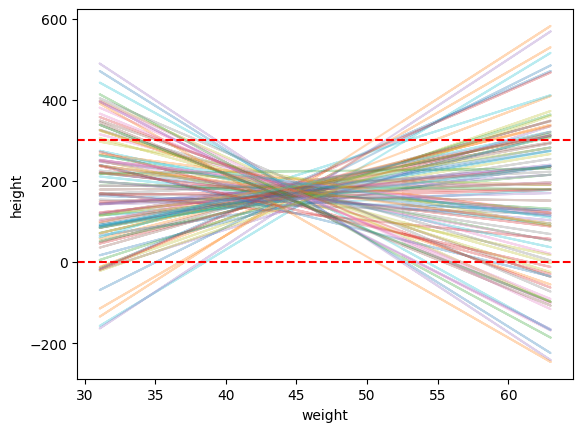

In [17]:
# Graficamos la altura promedio vs el peso
plt.plot(w, mu, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=300, color='r', linestyle='--')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

#### Mejorando las distribuciones previas

Con las distribuciones previas que usamos antes, la *altura promedio* podía tomar valores poco realistas, incluso para pesos dentro del rango normal. Podemos mejorar esto ajustando nuestras suposiciones iniciales.

Al observar el gráfico de dispersión, notamos que la relación entre altura y peso es **positiva**: las personas con mayor peso tienden a ser más altas.

Para reflejar este conocimiento previo, podemos asegurar que el parámetro $\beta$ (la pendiente) sea siempre positivo usando una **distribución Log-Normal** en lugar de una normal.  

Esta distribución solo toma valores mayores que cero:

$$
\beta \sim \text{LogNormal}(0, 1)
$$

Esto significa que el *logaritmo de $\beta$* sigue una distribución normal con media 0 y desviación estándar 1.  
En otras palabras, garantizamos que $\beta > 0$, lo que representa de forma natural la relación positiva entre peso y altura.

In [18]:
# Densidad lognormal
beta = stats.lognorm(s=1)

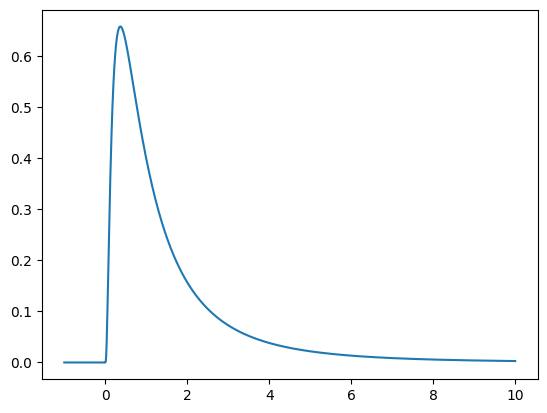

In [19]:
x = np.linspace(-1, 10, 1001)
plt.plot(x, beta.pdf(x))

In [20]:
# Simulación previa predictiva ahora con lognormal para beta
N=100
w = adultos.weight.values
w_bar = np.mean(w)

#---
alpha_samples = stats.norm.rvs(loc=170, scale=20, size=N)
beta_samples = beta.rvs(size=N) ## solo esto cambió
sigma_samples = stats.uniform.rvs(loc=0, scale=50, size=N)

#---
mu = alpha_samples + beta_samples * (w - w_bar).reshape(-1, 1)

#---
height_samples = stats.norm.rvs(loc=mu,
                                scale=sigma_samples)

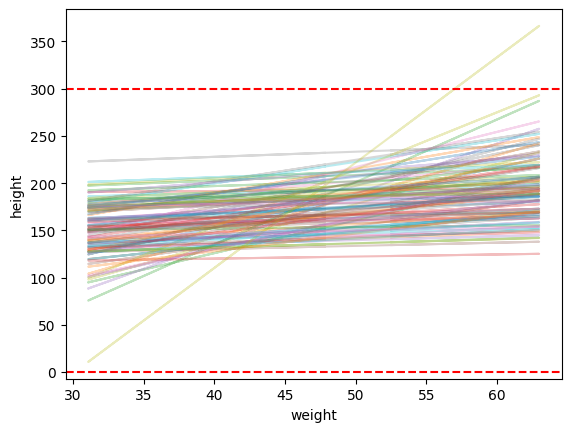

In [21]:
# Graficamos la altura promedio vs el peso
plt.plot(w, mu, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=300, color='r', linestyle='--')
plt.xlabel('weight')
plt.ylabel('height')
plt.show()

#### Simulación previa con la nueva distribución

**¡Esto se ve mucho mejor!**

Después de cambiar la distribución previa de $\beta$ a una **Log-Normal**, todas las pendientes son ahora positivas, reflejando correctamente que la altura aumenta con el peso.  

$$
\beta \sim \text{LogNormal}(0, 1)
$$

En el gráfico, cada línea representa una posible relación entre peso y altura generada desde las distribuciones previas.

A diferencia del caso anterior, ahora todas las líneas tienen pendiente positiva y las alturas simuladas se concentran en un rango más razonable (entre 0 y 300 cm).

De forma que nuestro modelo completo es:

$$
\begin{align}
\begin{array}{lcl}
h_i & \sim & \text{Normal}(\mu_i, \sigma) \\
\mu_i & = & \alpha + \beta(w_i - \bar{w}) \\
\alpha & \sim & \text{Normal}(170, 20) \\
\textcolor{red}{\beta} & \sim & \textcolor{red}{\text{Log-Normal}(0, 1)} \\
\sigma & \sim & \text{Uniform}(0, 50)
\end{array}
\end{align}
$$


### (d) Estimemos la distribución posterior usando MCMC

In [22]:
import arviz as az
import pymc as pm

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


In [23]:
w = adultos.weight.values
w_bar = np.mean(w)
h = adultos.height.values

In [24]:
w.shape

(352,)

In [25]:
w_bar

np.float64(44.99048551988636)

In [26]:
h.shape

(352,)

In [27]:
# Modelo

with pm.Model() as modelo_lineal_altura:
    # Sigma
    sigma = pm.Uniform('sigma',
                        lower=0,
                        upper=50)

    # Alpha
    alpha = pm.Normal('alpha',
                      mu=170,
                      sigma=20)
    # Beta
    beta = pm.Lognormal('beta',
                        mu=0,
                        sigma=1)

    # Mu
    mu = pm.Deterministic('mu',
                        alpha + beta * (w - w_bar))
    
    # altura
    altura = pm.Normal('altura',
                      mu=mu,
                      sigma=sigma,
                      observed=h) # alturas de mis datos
    
    # Muestreo
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 458 seconds.


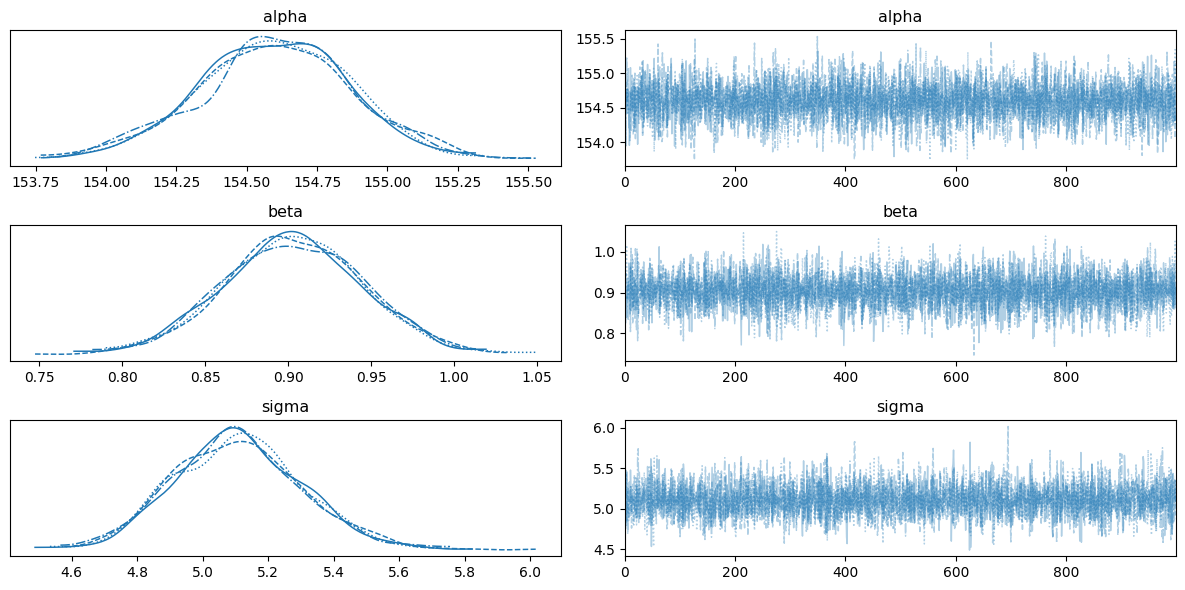

In [28]:
# Distribución posterior de los parámetros
az.plot_trace(idata, var_names=["alpha", "beta", "sigma"])
plt.tight_layout()

In [29]:
az.summary(idata, var_names=["alpha", "beta", "sigma"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,154.599,0.273,154.090,155.134,0.004,0.004,5738.0,3138.0,1.0
beta,0.903,0.042,0.829,0.985,0.001,0.001,6574.0,3009.0,1.0
sigma,5.106,0.197,4.743,5.473,0.003,0.003,5308.0,2991.0,1.0


> ¿qué podríamos concluir?
>
> - La altura promedio es de 155 cm.
> - Por cada 1 kg adicional de peeso, se espera que la altura aumente en alrededor de 0.9 cm.
> - El 94% del intervalo de credibilidad para $beta$ se encuentra entre $0.82$ y $0.98$.

#### Predicciones con la distribución posterior

El objetivo principal de este modelo es _realizar predicciones_ a partir de la distribución posterior de los parámetros.

Lo primero que podríamos hacer es tomar el promedio de las muestras de $\alpha$ y $\beta$ y graficar la relación promedio entre peso y altura:

In [30]:
# objeto de muestreo
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [31]:
post_samples = idata.posterior.to_dataframe()
post_samples

alpha      beta          mu     sigma
chain draw mu_dim_0                                            
0     0    0         154.795857  0.981895  157.579648  5.003727
           1         154.795857  0.981895  146.445156  5.003727
           2         154.795857  0.981895  141.907851  5.003727
           3         154.795857  0.981895  162.701514  5.003727
           4         154.795857  0.981895  151.149479  5.003727
...                         ...       ...         ...       ...
3     999  347       154.419339  0.973643  156.406869  5.064486
           348       154.419339  0.973643  143.958242  5.064486
           349       154.419339  0.973643  161.402882  5.064486
           350       154.419339  0.973643  163.252235  5.064486
           351       154.419339  0.973643  161.761711  5.064486

[1408000 rows x 4 columns]

Después de ajustar el modelo, tenemos muchas **muestras posteriores** de los parámetros $\alpha$, $\beta$ y $\sigma$, obtenidas del muestreador NUTS.

Cada muestra representa una posible versión del modelo compatible con los datos observados.

Entonces, cuando calculamos lo siguiente, lo que hacemos es usar los **valores promedio de los parámetros** para construir una sola línea representativa, la “relación promedio” entre peso y altura.

En términos estadísticos:

$$
E[\mu_i] = E[\alpha] + E[\beta] (w_i - \bar{w})
$$

In [32]:
# relación promedio
alpha_avg = post_samples.alpha.mean()
beta_avg = post_samples.beta.mean()
mu_avg = alpha_avg + beta_avg * (w - w_bar)

In [33]:
print(alpha_avg)

154.59878966717534


In [34]:
print(beta_avg)

0.902993508284969


In [35]:
print(mu_avg.shape)

(352,)


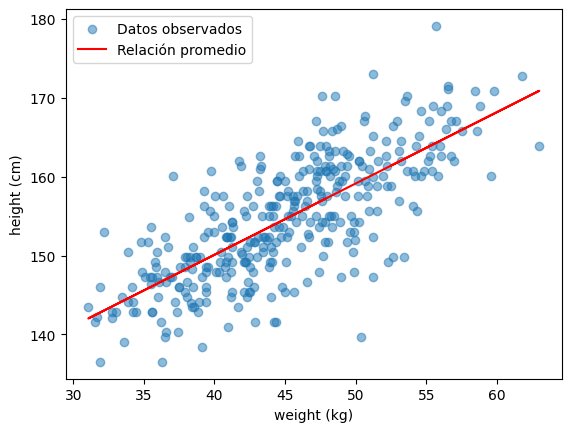

In [36]:
# -- scatter
plt.scatter(adultos.weight,
            adultos.height,
            alpha=0.5,
            label='Datos observados')
# -- línea
plt.plot(w, mu_avg, color='red', label='Relación promedio')
plt.xlabel('weight (kg)')
plt.ylabel('height (cm)')
plt.legend()

* **Línea roja:**

La línea más plausible dentro del conjunto de líneas posibles que describe la distribución posterior.

* **Franja de incertidumbre**

Sin embargo, el modelo no solo nos da una única línea, sino también una **incertidumbre** sobre esa relación.

Podemos visualizarla muestreando varias combinaciones de $\alpha$ y $\beta$ desde la distribución posterior y graficando las líneas resultantes.

Estas líneas representan **distintas relaciones posibles** entre el peso y la altura, según la información contenida en los datos y la variabilidad del modelo.

In [37]:
posterior_samples = post_samples.sample(500)
post_mu = posterior_samples.alpha.values + posterior_samples.beta.values * (w - w_bar).reshape(-1, 1)

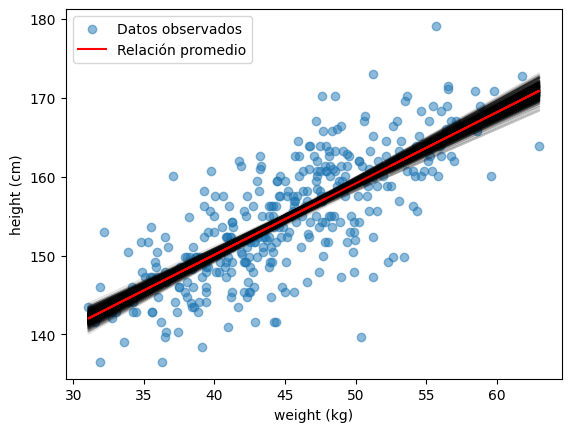

In [38]:
# -- scatter
plt.scatter(adultos.weight,
            adultos.height,
            alpha=0.5,
            label='Datos observados')

# -- líneas
plt.plot(w, post_mu, color='black', alpha=0.1)
plt.plot(w, mu_avg, color='red', label='Relación promedio')
plt.xlabel('weight (kg)')
plt.ylabel('height (cm)')
plt.legend()

#### Interpretación del gráfico

En la figura se muestran los **datos observados** (puntos azules) junto con las **predicciones del modelo**:

- **Línea roja:** representa la *relación promedio* entre peso y altura, calculada a partir del valor medio de los parámetros posteriores ($E[\alpha]$ y $E[\beta]$).  
  Esta línea indica la tendencia central: cuánto se espera que aumente la altura al incrementar el peso.

- **Líneas negras semitransparentes:** muestran distintas *rectas posibles* obtenidas al muestrear varias combinaciones de $\alpha$ y $\beta$ desde la distribución posterior.  
  Estas líneas reflejan la $\textcolor{red}{incertidumbre\ de\ la\ media}$: aunque todas apuntan a una relación positiva, varían ligeramente en su pendiente e intercepto.

#### Preguntas que nos podríamos hacer

> _¿Cuánto es la altura promedio de una persona de 60 kg?_

Usaremos las muestras de la posterior para responder esta pregunta.

In [39]:
post_samples.head()

alpha      beta          mu     sigma
chain draw mu_dim_0                                            
0     0    0         154.795857  0.981895  157.579648  5.003727
           1         154.795857  0.981895  146.445156  5.003727
           2         154.795857  0.981895  141.907851  5.003727
           3         154.795857  0.981895  162.701514  5.003727
           4         154.795857  0.981895  151.149479  5.003727

In [40]:
# Promediar sobre mu_dim_0
posterior_reduced = post_samples.groupby(["chain", "draw"])[["alpha", "beta", "sigma"]].mean().reset_index()
posterior_reduced

,chain,draw,alpha,beta,sigma
0,0,0,154.795857,0.981895,5.003727
1,0,1,154.812761,0.825244,5.174800
2,0,2,154.709150,0.883525,4.793960
3,0,3,154.709150,0.883525,4.793960
4,0,4,154.417637,0.892126,5.454047
...,...,...,...,...,...
3995,3,995,154.521926,0.861555,5.177845
3996,3,996,154.700385,0.927564,4.840888
3997,3,997,154.700385,0.927564,4.840888
3998,3,998,154.267990,0.871437,5.352156


In [41]:
# calcular mu a 60 kg
mu_60 = posterior_reduced["alpha"].values + posterior_reduced["beta"].values * (60 - w_bar)
mu_60.shape

(4000,)

<Axes: >

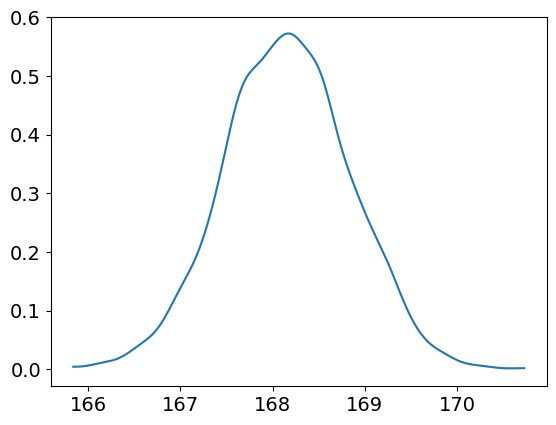

In [42]:
az.plot_kde(mu_60)

In [43]:
az.summary(mu_60, hdi_prob=0.89)

arviz - WARNING - Shape validation failed: input_shape: (1, 4000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,168.152,0.684,167.122,169.3,0.009,0.011,6415.0,3102.0,NaN


#### Diferencia entre la posterior y la posterior predictiva

Piensen en la **línea roja** como lo que el modelo cree que pasa *en promedio*.  
Las **líneas negras** son sus dudas sobre esa línea — podría ser un poco más inclinada o más plana.  

Pero las personas reales no caen exactamente sobre la línea, ¿verdad?  
La **banda naranja** muestra esa variación natural: lo que el modelo esperaría si midiera nuevas personas.

<details>
<summary> Más a fondo... 💡</summary>

### Posterior

En la **posterior**, el modelo estima la distribución de los parámetros  
$\alpha, \beta, \sigma$ dados los datos observados:

$$
p(\alpha, \beta, \sigma \mid \text{datos})
$$

Con esas muestras podemos calcular la **altura media esperada** para cada persona:

$$
\mu_i^{(s)} = \alpha^{(s)} + \beta^{(s)} (w_i - \bar{w})
$$

Esto describe la **incertidumbre sobre la recta promedio**,  
pero **no incluye todavía la variabilidad natural** de las alturas individuales.

### Posterior predictiva

La **posterior predictiva** usa esas mismas muestras de la posterior para simular cómo se verían *nuevos datos reales* si repitiéramos el experimento:

$$
h_i^{(s)} \sim \text{Normal}(\mu_i^{(s)}, \sigma^{(s)})
$$

Aquí el modelo agrega la variabilidad individual (\(\sigma\)), lo que genera la **banda naranja**: una franja más ancha que refleja la dispersión esperada de las alturas reales.


| Concepto | Qué muestra | Fórmula principal | Banda en el gráfico |
|-----------|--------------|-------------------|--------------------|
| **Posterior** | Incertidumbre sobre los parámetros y la recta promedio | $ \mu_i = \alpha + \beta (w_i - \bar{w}) $ | Banda **angosta** |
| **Posterior predictiva** | Incertidumbre sobre los datos reales (media + ruido) | $ h_i \sim \text{Normal}(\mu_i, \sigma) $ | Banda **ancha (naranja)** |

</details>

### (e) ¿y, $\sigma$?

Recordemos que el modelo completo para la altura es:

$$
\begin{align}
h_i & \sim \text{Normal}(\mu_i, \sigma)
\end{align}
$$

Hasta ahora nos hemos enfocado en $\mu_i$, que representa la altura promedio esperada para una persona con cierto peso.

Sin embargo, el modelo también incluye la _variabilidad_ de las alturas alrededor de ese promedio y esa variabilidad está controlada por el parámetro $\sigma$.

In [44]:
with modelo_lineal_altura:
    idata.extend(pm.sample_posterior_predictive(idata))

Sampling: [altura]


Output()

In [45]:
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

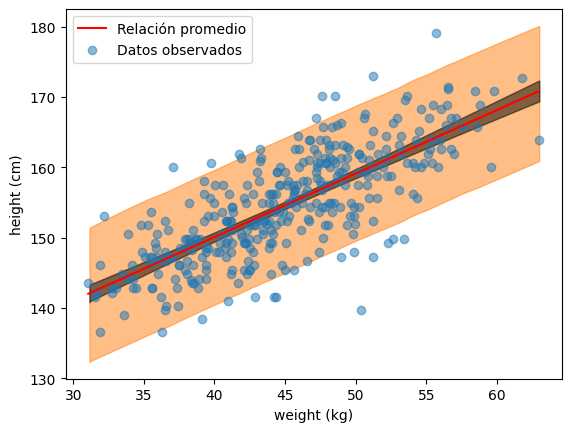

In [46]:
# Eje x
x = adultos.weight.values
order = x.argsort()

# HDI de la posterior predictiva (incertidumbre total: params + σ)
az.plot_hdi(x, idata.posterior_predictive["altura"])

# HDI de la media condicional (incertidumbre de parámetros, sin σ)
az.plot_hdi(x, idata.posterior["mu"], color="black")

# Línea de relación promedio (media posterior de μ)
mean_mu = idata.posterior["mu"].mean(dim=["chain","draw"])
plt.plot(x[order], mean_mu.isel(mu_dim_0=order), color="red", label="Relación promedio")

# Datos observados
plt.scatter(adultos.weight, adultos.height, alpha=0.5, label="Datos observados")

plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.legend()
plt.show()

## 2. Evaluación del modelo

Hasta ahora, hemos utilizado los mismos datos que sirvieron para ajustar el modelo al momento de visualizar sus predicciones.

Si queremos comprobar qué tan bien generaliza a casos nuevos, necesitamos probarlo en **datos que no haya visto antes**.

> ¿cómo evaluar su desempeño predictivo en datos nuevos?

In [47]:
# Primero dividimos el conjunto de datos original en dos partes:
train = adultos.sample(frac=0.8)
test = adultos.drop(train.index)
adultos.shape, train.shape, test.shape

((352, 4), (282, 4), (70, 4))

In [48]:
#Definimos las variables  para el modelo
w=train.weight.values #datos de peso para train
w_bar = np.mean(w) #promedio de peso
h=train.height.values #datos de altura para train

In [49]:
#Construcción del modelo bayesiano

with pm.Model() as modelo_lineal_altura:

    w = pm.Data("w", w, dims="obs_id") # datos mutables; contenedor
    h = pm.Data("h", h, dims="obs_id")

    # Sigma
    sigma = pm.Uniform('sigma',
                        lower=0,
                        upper=50)
    # Alpha
    alpha = pm.Normal('alpha',
                      mu=170,
                      sigma=20)
    # Beta
    beta = pm.Lognormal('beta',
                        mu=0,
                        sigma=1)
    # Mu
    mu = pm.Deterministic('mu',
                        alpha + beta * (w - w_bar), dims="obs_id")
    # altura
    altura = pm.Normal('altura',
                      mu=mu,
                      sigma=sigma,
                      observed=h, dims="obs_id")

    # Muestreo
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, alpha, beta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 438 seconds.


In [50]:
# Con el modelo entrenado, predecimos sobre datos de prueba
w_test = test.weight.values

In [51]:
w_test[:5]

array([31.864838 , 38.2434755, 47.7      , 38.3568735, 37.9032815])

Primero actualizamos el modelo con los nuevos pesos (``set_data``), y luego generamos predicciones usando los parámetros aprendidos (``sample_posterior_predictive``), sin volver a entrenar el modelo.

In [52]:
with modelo_lineal_altura:
    pm.set_data({"w": w_test}) # actualiza el contenedor w del modelo con los pesos del test (sin re-entrenar).
    #muestreo posterior predictivo
    altura_pred = pm.sample_posterior_predictive(
        idata,
        var_names=["altura", "mu"],
        return_inferencedata=True,
        predictions=True,
        extend_inferencedata=True
    )

Sampling: [altura]


Output()

| Argumento | Qué hace |
|------------|-----------|
| `idata` | Usa las muestras del modelo entrenado (α, β, σ) para generar predicciones. |
| `var_names` | Especifica qué variables del modelo queremos predecir. En este caso, pedimos tanto las alturas simuladas (`altura`) como las medias esperadas (`mu`). |
| `return_inferencedata=True` | Devuelve los resultados en formato **ArviZ InferenceData**, lo que facilita el análisis posterior. |
| `predictions=True` | Guarda las predicciones bajo la sección `idata.predictions`, separadas del posterior original. |
| `extend_inferencedata=True` | Agrega estas nuevas predicciones al mismo objeto `idata` sin sobrescribir la información anterior. |


In [53]:
altura_pred

Inference data with groups:
	> posterior
	> predictions
	> sample_stats
	> observed_data
	> constant_data
	> predictions_constant_data

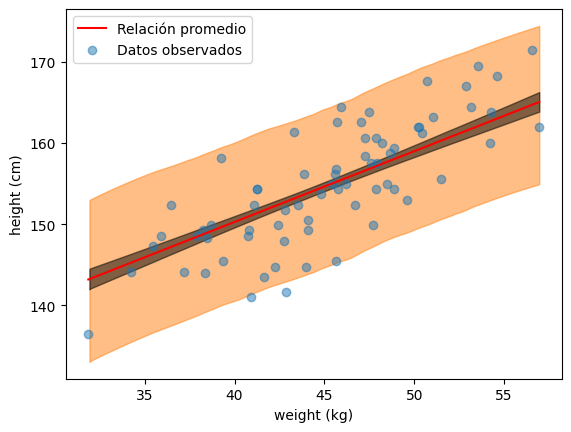

In [54]:
# Eje X 
x = test.weight.values
order = x.argsort()

# HDI de la posterior predictiva (incertidumbre total: params + σ)
az.plot_hdi(x, altura_pred.predictions["altura"])

# HDI de la media condicional (incertidumbre de parámetros, sin σ)
az.plot_hdi(x, altura_pred.predictions["mu"], color="black")

# Línea de relación promedio (media posterior de μ)
mean_mu = altura_pred.predictions["mu"].mean(dim=["chain","draw"])  # dims: ('obs_id',)
plt.plot(x[order], mean_mu.isel(obs_id=order), color="red", label="Relación promedio")

# Datos observados
plt.scatter(test.weight, test.height, alpha=0.5, label="Datos observados")

plt.xlabel("weight (kg)")
plt.ylabel("height (cm)")
plt.legend()
plt.show()

#### Métricas de evaluación

In [55]:
from sklearn.metrics import r2_score, mean_squared_error

In [56]:
r2_score(test['height'], altura_pred.predictions["mu"].mean(("chain", "draw")))

0.6023863409899273

In [57]:
mean_squared_error(test['height'], altura_pred.predictions["mu"].mean(("chain", "draw")))

22.75521189053069

In [58]:
# Calcular la cobertura del 90% de los intervalos predictivos

# calculamos el intervalo creíble (HDI) del 90% para las alturas predichas
hdi_90 = az.hdi(altura_pred.predictions["altura"], hdi_prob=0.9)

# extraemos los límites inferior y superior del intervalo
lower = hdi_90["altura"].sel(hdi="lower").values
upper = hdi_90["altura"].sel(hdi="higher").values

# calculamos la proporción de observaciones reales dentro del intervalo
coverage_90 = ((test["height"].values >= lower) & (test["height"].values <= upper)).mean()

print(f"Cobertura del 90%: {coverage_90*100:.1f}%")

Cobertura del 90%: 91.4%


significa que, de todas las observaciones reales del conjunto de prueba (las alturas verdaderas), el $92.9 \%$ cayó dentro del intervalo predictivo del $90 \%$ que generó nuestro modelo.

In [59]:
# Predicción media por observación
y_pred_mean = altura_pred.predictions["mu"].mean(("chain", "draw")).values

# Intervalo de credibilidad del 90%
hdi_90 = az.hdi(altura_pred.predictions["altura"], hdi_prob=0.9)
lower = hdi_90["altura"].sel(hdi="lower").values
upper = hdi_90["altura"].sel(hdi="higher").values

# Combinar todo en un df para inspeccionar
pred_df = pd.DataFrame({
    "peso_test": test["weight"].values,
    "altura_real": test["height"].values,
    "altura_pred_media": y_pred_mean,
    "pred_lo_90": lower,
    "pred_hi_90": upper
})

# si la observación cae dentro del intervalo
pred_df["en_intervalo"] = (
    (pred_df["altura_real"] >= pred_df["pred_lo_90"]) &
    (pred_df["altura_real"] <= pred_df["pred_hi_90"])
)

pred_df.head(10)

,peso_test,altura_real,altura_pred_media,pred_lo_90,pred_hi_90,en_intervalo
0,31.864838,136.5250,143.183618,134.155235,151.628678,True
1,38.243476,149.2250,148.742334,140.011846,157.352324,True
2,47.700000,149.9000,156.983299,148.324319,165.742294,True
3,38.356873,143.9418,148.841155,139.897801,157.012341,True
4,37.903281,148.5900,148.445869,140.193645,157.279880,True
5,35.465224,147.3200,146.321204,137.669633,154.943044,True
6,56.557252,171.4500,164.702024,155.601762,172.643398,True
7,41.248522,154.3050,151.361106,143.017104,159.957270,True
8,46.719976,152.4000,156.129249,147.925899,165.619158,True
9,45.897841,164.4650,155.412793,146.867346,164.062796,False


In [60]:
pred_df.en_intervalo.value_counts()

en_intervalo
True     64
False     6
Name: count, dtype: int64

## Comentarios finales

> * La **función lineal** utilizada en este modelo no es la única posible.
> Así como vimos en la clase de ajuste de polinomios, podríamos emplear funciones no lineales (cuadráticas, cúbicas,   exponenciales, etc.) para capturar relaciones más complejas entre las variables.
> Aquí usamos una forma lineal por simplicidad y claridad conceptual.
>
> * Todas las consideraciones de ingeniería de características que aplican en modelos de regresión clásica (escalamiento, centrado, transformación, creación de variables, etc.) **también aplican en modelos bayesianos.** Estas decisiones influyen directamente en la estabilidad numérica, la interpretación de los parámetros y la velocidad de muestreo.
>
> * La parte más ingenieril/artesanal del modelado bayesiano radica en definir adecuadamente las distribuciones previas y probar distintas formulaciones del modelo. Es decir, el trabajo no solo consiste en ajustar el modelo, sino en reflexionar sobre qué suposiciones probabilísticas representan mejor el fenómeno que queremos describir.

## Extra: Modelo lineal multivariable

Incorporamos ahora tres predictores:  
- el **peso** ($w_i$),  
- la **edad** ($a_i$),  
- y el **sexo** ($s_i$), codificado como $s_i = 0$ para mujeres y $s_i = 1$ para hombres.  

El modelo jerárquico queda definido así:

$$
\begin{align}
h_i &\sim \text{Normal}(\mu_i, \sigma) \\
\mu_i &= \alpha + \beta_w (w_i - \bar{w}) + \beta_a (a_i - \bar{a}) + \beta_s s_i \\
\alpha &\sim \text{Normal}(170, 20) \\
\beta_w &\sim \text{Normal}(0, 1) \\
\beta_a &\sim \text{Normal}(0, 1) \\
\beta_s &\sim \text{Normal}(0, 10) \\
\sigma &\sim \text{Uniform}(0, 50)
\end{align}
$$

### Interpretación de los parámetros

- $\alpha$: altura promedio cuando el peso y la edad están en su media y el sexo es femenino ($s_i=0$).  
- $\beta_w$: cambio promedio en altura por cada unidad adicional de **peso**, manteniendo edad y sexo constantes.  
- $\beta_a$: cambio promedio en altura por cada unidad adicional de **edad**, manteniendo peso y sexo constantes.  
- $\beta_s$: diferencia promedio en altura entre **hombres** y **mujeres**, controlando por peso y edad.  
- $\sigma$: desviación estándar del error, representa la variabilidad no explicada por el modelo.
